<a href="https://colab.research.google.com/github/Arnobzzz/Data-Analysis-Projects/blob/main/Amazon_Data_Preparation_prediction_deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
## import all the necessary libraries
import warnings

#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk

In [21]:
##reading dataset
df = pd.read_csv('/content/Reviews.csv')

print(df.shape)
df.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Assigning different different labels to helpful% according to its value

In [24]:
# Calculate the helpfulness percentage and handle division by zero
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], 0)

In [25]:
pd.cut(df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

,Helpful %
0,80-100%
1,Empty
2,80-100%
3,80-100%
4,Empty
...,...
568449,Empty
568450,Empty
568451,80-100%
568452,80-100%


In [26]:
df['%upvote'] = pd.cut( df['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [27]:
df.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty     20326      20326   20326        20324                 20326   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty     14838      14838   14838        14837                 14838   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty     23485      23485   23485        23485                 23485   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty     46796      46796   46796        46795                 46796   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty    198381     198381  198381       198364                198381   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10311                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful %  
Score %upvote                                                              
1     Empty                     20326   20326    20326   20326      20326  
      0-20%                      2338    2338     2338    2338       2338  
      20-40%                     4649    4649     4649    4649       4649  
      40-60%                     6586    6586     6586    6586       6586  
      60-80%                     5838    5838     5838    5838       5838  
      80-100%                   12531   12531    12531   12531      12531  
2     Empty                     14838   14838    14838   14838      14838  
      0-20%                       762     762      737     762        762  
      20-40%                     1618    1618     1618    1618       1618  
      40-60%                     3051    3051     3051    3051       3051  
      60-80%                     2486    2486     2486    2486       2486  
      80-100%                    7014    7014     7014    7014       7014  
3     Empty                     23485   23485    23484   23485      23485  
      0-20%                       474     474      474     474        474  
      20-40%                     1506    1506     1506    1506       1506  
      40-60%                     3384    3384     3384    3384       3384  
      60-80%                     2754    2754     2754    2754       2754  
      80-100%                   11037   11037 

Considering only Id Column, as I have to count Total Upvotes for different different categories

In [28]:
df.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty     20326
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty     14838
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty     23485
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty     46796
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty    198381
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [29]:
df_s=df.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
df_s

,Score,%upvote,Id
0,1,Empty,20326
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,14838
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


Creating Pivot Table for better conclusion

In [30]:
df_s.pivot(index='%upvote',columns='Score')

Id                             
Score        1      2      3      4       5
%upvote                                    
Empty    20326  14838  23485  46796  198381
0-20%     2338    762    474    116     432
20-40%    4649   1618   1506    909    2275
40-60%    6586   3051   3384   3185   10312
60-80%    5838   2486   2754   2941   11060
80-100%  12531   7014  11037  26707  140661

Creating heatmap of it,for better Visualisations

Text(0.5, 1.0, 'How helpful users find among user scores')

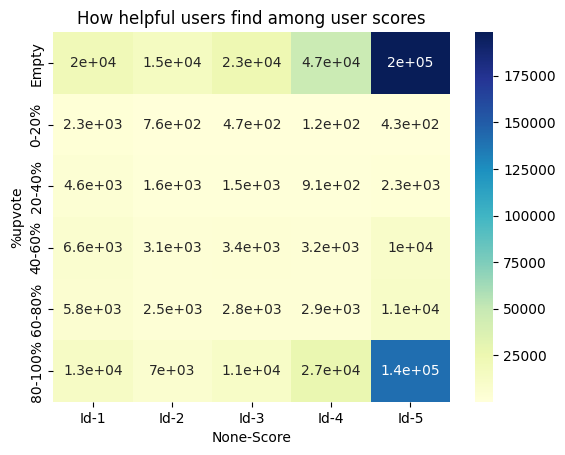

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_s.pivot(index='%upvote',columns='Score'),annot=True,cmap = 'YlGnBu')
plt.title('How helpful users find among user scores')

In [32]:
df.shape

(568454, 12)

In [33]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0,Empty
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.0,Empty


In [34]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [35]:
df2 = df[df['Score'] != 3]
X = df2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

Scoring prediction

# **Converting text into vectors using NLP**

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')

In [37]:
X_c = c.fit_transform(X)

In [38]:
print('features: {}'.format(X_c.shape[1]))

features: 114969


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 394360


In [40]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [41]:
ml =log.fit(X_train, y_train)
acc = ml.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

Model Accuracy: 0.9359776043330746


Fetching Top 20 Positive & Top 20 negative words

In [42]:
w = c.get_feature_names_out()
w

array(['00', '000', '0000', ..., 'être', 'île', 'ît'], dtype=object)

In [43]:
coef = ml.coef_.tolist()[0]
coef

[-0.3498903026234124,
 0.03442218484660005,
 0.35865174577385983,
 -0.007973105558062056,
 -0.008357946655971935,
 -0.014053932436107024,
 0.0004205903130924435,
 -0.0076156535378458096,
 0.0006736443477623372,
 0.0,
 0.0020754086552260595,
 -0.014252225098551024,
 0.0023245041443951497,
 0.010895665755953,
 -0.1591747748038066,
 0.002567785023603282,
 0.003274447346560679,
 0.0029950155698799494,
 0.0009575702818984568,
 5.154266235895983e-05,
 0.11924974271078498,
 0.0,
 0.03683181165031566,
 0.03683181165031566,
 0.03683181165031566,
 0.03683181165031566,
 0.03683181165031566,
 0.03683181165031566,
 0.03683181165031566,
 0.03683181165031566,
 0.03683181165031566,
 -0.0004507814035199509,
 0.051085016363407613,
 0.00011024842324310154,
 -0.10924945213721078,
 -0.00047605553343592897,
 0.0,
 0.004218296849858105,
 0.10487956454537782,
 2.117279501209207e-05,
 -0.10698841509102272,
 0.0,
 0.00011049815154710005,
 0.0029405747105227297,
 -0.07174010221255378,
 0.0,
 0.012091755136347469

In [44]:
coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_df

,Word,Coefficient
0,00,-0.349890
1,000,0.034422
2,0000,0.358652
3,000001,-0.007973
4,00001,-0.008358
...,...,...
114964,çaykur,0.000000
114965,çelem,-0.134661
114966,être,0.023558
114967,île,0.013106


In [45]:
coeff_df = coeff_df.sort_values(['Coefficient', 'Word'],ascending=False)
coeff_df

,Word,Coefficient
80600,pleasantly,4.098562
39072,downside,3.554256
5865,addicting,3.403958
94667,skeptical,3.063026
39214,drawback,2.447540
...,...,...
113164,worst,-3.393802
24949,cancelled,-3.442137
106852,unacceptable,-3.596368
34989,deceptive,-3.725799


In [46]:
print('-Top 20 positive-')
print(coeff_df.head(20).to_string(index=False))
print('\n')
print('-Top 20 negative-')
print(coeff_df.tail(20).to_string(index=False))

-Top 20 positive-
      Word  Coefficient
pleasantly     4.098562
  downside     3.554256
 addicting     3.403958
 skeptical     3.063026
  drawback     2.447540
   welcome     2.433427
     saves     2.409061
    hooked     2.376102
      whim     2.368055
    delish     2.363536
  tastiest     2.345264
  hesitant     2.332809
  terrific     2.237619
    solved     2.224887
   trainer     2.198722
     penny     2.179888
    divine     2.140252
  obsessed     2.120652
  relaxing     2.119265
   awesome     2.113128


-Top 20 negative-
          Word  Coefficient
         lousy    -2.427921
        bummer    -2.460579
        lacked    -2.567998
       glowing    -2.607695
   disapointed    -2.630953
       vomited    -2.684022
    returnable    -2.710925
disappointment    -2.713062
       defeats    -2.732671
    overpowers    -2.783969
   embarrassed    -2.945959
        ripoff    -2.949568
         ruins    -3.077705
      mediocre    -3.101273
 disappointing    -3.204695
         w

Lets try to create a function so that I can apply mutliple NLP Techniques + Multiple Ml algos in such a way that I will acheive my best accuracy

In [47]:
def text_fit(X, y, nlp_model,ml_model,coef_show=1):

    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))

    if coef_show == 1:
        w = nlp_model.get_feature_names_out()
        coef = ml.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')
        print(coeff_df.tail(20).to_string(index=False))

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression

In [49]:
text_fit(X, y, c, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.935414669770414


-Top 20 positive-
      Word  Coefficient
pleasantly     4.058036
  downside     3.227953
    hooked     2.949594
 addicting     2.931769
 skeptical     2.857481
    resist     2.599184
   worries     2.393202
  drawback     2.322001
 delighted     2.283336
      calm     2.275495
  terrific     2.263247
  hesitant     2.207471
     penny     2.203874
    brings     2.201561
   trainer     2.150935
    delish     2.087464
  obsessed     2.069761
   welcome     2.042941
economical     1.972059
   perfect     1.907273


-Top 20 negative-
         Word  Coefficient
       bummer    -2.382623
      glowing    -2.442711
      vomited    -2.509958
  disapointed    -2.523659
   flavorless    -2.555924
      defeats    -2.559007
        lousy    -2.575105
        blech    -2.611047
       ripoff    -2.622505
       lacked    -2.631385
   returnable    -2.675293
   unbearable    -2.684639
  embarra

Lets define a predict function

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
def predict(X, y, nlp_model,ml_model):

    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    ml =ml_model.fit(X_train, y_train)
    predictions=ml.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [52]:
predict(X,y,c,lr)

features: 114969
 train records: 394360
 test records: 131454
[[ 14781   2788]
 [  5533 108352]]
0.93670029059595


Accuracy is around 93.9% - not bad. However we notice that some of those significant coefficients are not meaningful, e.g. 280mg.

In [53]:
from sklearn.dummy import DummyClassifier

In [54]:
text_fit(X, y, c, DummyClassifier(),0)

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.842910828122385


Logistic regression model on TFIDF

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9352168819511008


-Top 20 positive-
      Word  Coefficient
     great    13.554625
      best    12.408790
 delicious    12.214374
   perfect    10.484293
 excellent     9.549883
     loves     9.519196
    highly     8.909621
      love     8.417399
 wonderful     7.929046
   amazing     7.806667
  favorite     7.534232
    hooked     7.491274
   awesome     7.385805
      good     7.355430
pleasantly     7.340035
      nice     7.178953
     yummy     7.002907
 fantastic     6.851947
   pleased     6.590059
      glad     6.302297


-Top 20 negative-
          Word  Coefficient
         sadly    -5.753579
         hopes    -5.806450
          yuck    -5.836990
    disgusting    -5.984499
   undrinkable    -5.992363
         stale    -6.211939
        return    -6.234708
         worse    -6.277633
         bland    -6.341845
         threw    -6.518889
     tasteless    -6.558360
          weak    -6.99

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
predict(X, y, tfidf, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
[[ 14093   2257]
 [  6290 108814]]
0.9349810580126888


# **Upvote prediction**



We will be focusing on score 5 reviews, and get rid of comments with neutral votes



In [57]:
data = df[df['Score'] == 5]

In [58]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvote'],
      dtype='object')

In [59]:
data2 = data[data['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(154428, 12)

In [60]:
X = data2['Text']

In [61]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%upvote'].map(y_dict)

In [62]:
print(y.value_counts())

%upvote
1.0    151721
0.0      2707
Name: count, dtype: int64



The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative ones.

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tf=TfidfVectorizer()

In [65]:
X_c=tf.fit_transform(X)

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [67]:
y_test.value_counts()

,count
%upvote,
1.0,45493
0.0,836


In [68]:
from imblearn.over_sampling import RandomOverSampler

In [69]:
os =  RandomOverSampler()

In [70]:
X_train_res, y_train_res = os.fit_resample(X_c, y)

In [71]:
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [72]:
from collections import Counter

In [73]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
log_class=LogisticRegression()

In [76]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [77]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [78]:
clf=GridSearchCV(estimator=log_class,param_grid=grid,cv=5,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [79]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  836     0]
 [ 1283 44210]]
0.9723067625029679


# **Dashboard**

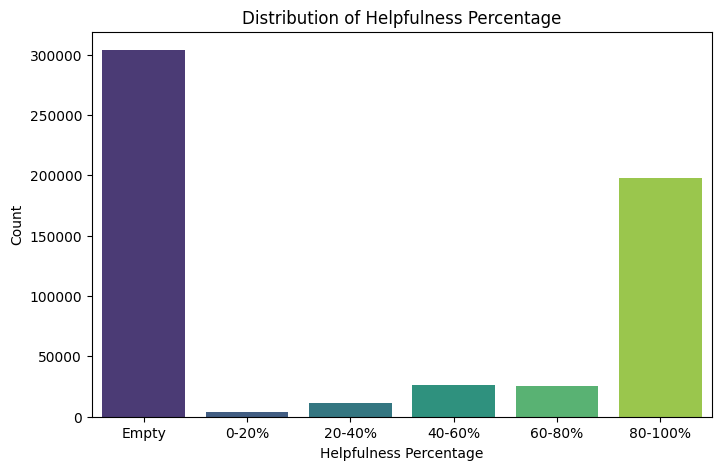

In [80]:
# Visualize the distribution of helpfulness percentage
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='%upvote', order=['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], palette='viridis')
plt.title('Distribution of Helpfulness Percentage')
plt.xlabel('Helpfulness Percentage')
plt.ylabel('Count')
plt.show()

## Conclusion

Based on the visualizations, we can see that there is a strong correlation between high scores and high helpfulness percentages. The sentiment analysis also reveals specific words that are highly indicative of positive and negative reviews. This information can be valuable for understanding customer feedback and improving products or services.

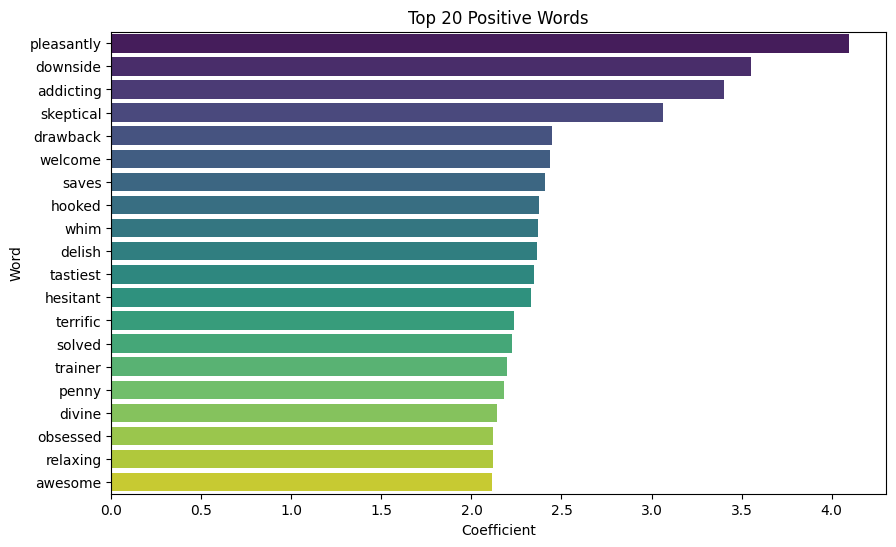

In [82]:
# Visualize top 20 positive words
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Word', data=coeff_df.head(20), palette='viridis')
plt.title('Top 20 Positive Words')
plt.xlabel('Coefficient')
plt.ylabel('Word')
plt.show()

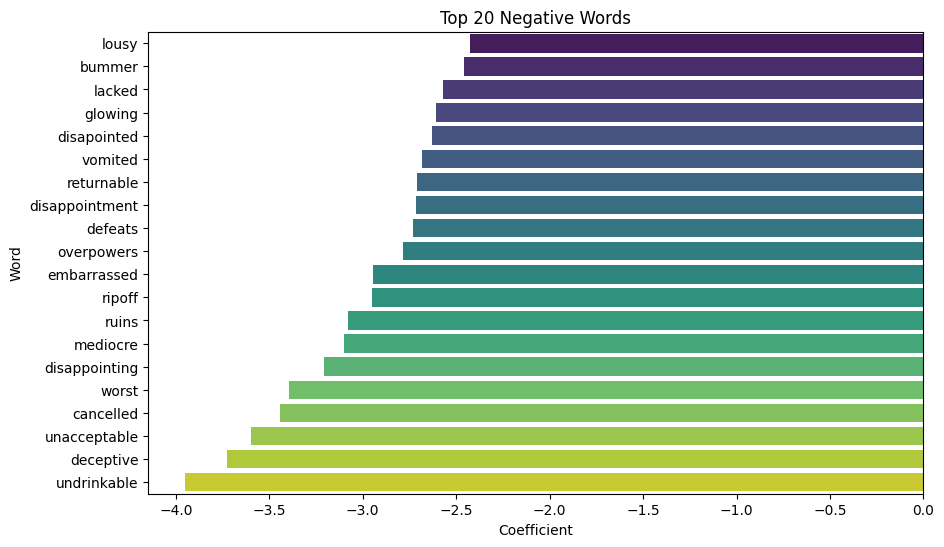

In [83]:
# Visualize top 20 negative words
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Word', data=coeff_df.tail(20), palette='viridis')
plt.title('Top 20 Negative Words')
plt.xlabel('Coefficient')
plt.ylabel('Word')
plt.show()

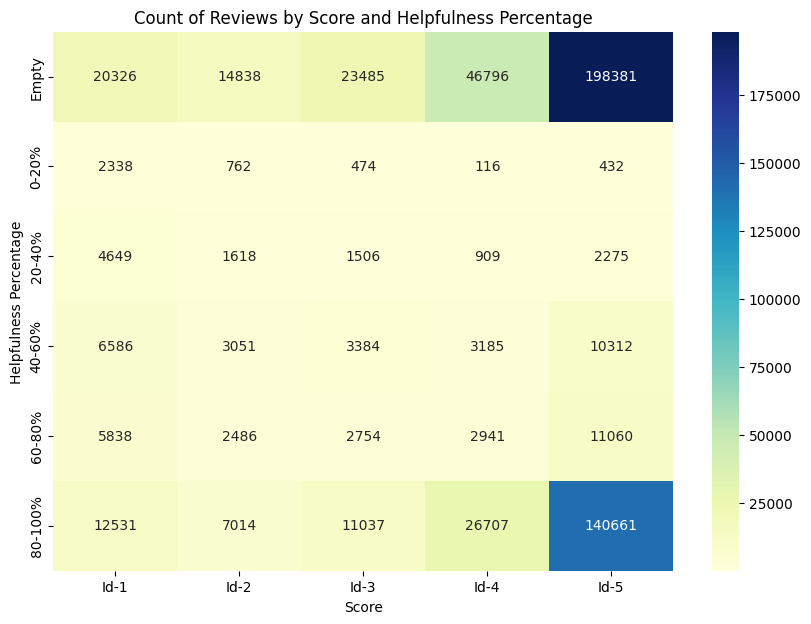

In [81]:
# Visualize the relationship between scores and helpfulness using the previously created pivot table
plt.figure(figsize=(10, 7))
sns.heatmap(df_s.pivot(index='%upvote', columns='Score'), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Count of Reviews by Score and Helpfulness Percentage')
plt.xlabel('Score')
plt.ylabel('Helpfulness Percentage')
plt.show()